In [1]:
# potrzebne biblioteki:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# wczytujemy plik CSV wygenerowany przez wcześniejszy skrypt
frame_data = pd.read_csv("good_bad_ugly.csv", sep=";", decimal=",")

# zmiana numeru klatki na czas; film na 24 klatki/sekundę
frame_data['time_s'] = pd.to_datetime(frame_data['frame'] / 24, unit='s')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


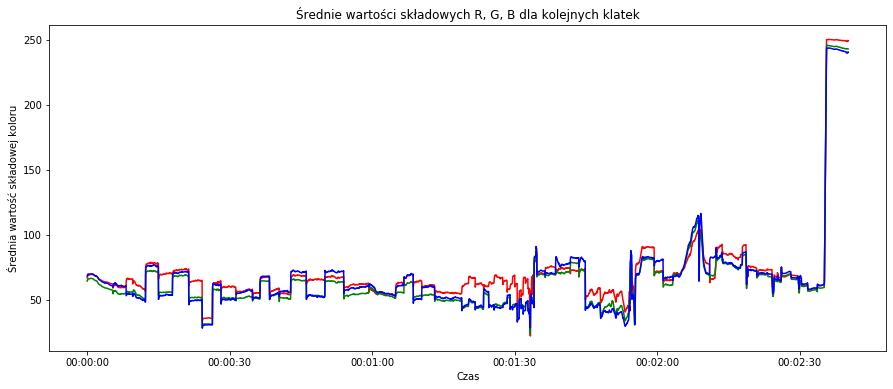

In [2]:
# średnie w przestrzeni RGB
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data, x='time_s', y='mean_red', color='red')
sns.lineplot(data=frame_data, x='time_s', y='mean_green', color='green')
sns.lineplot(data=frame_data, x='time_s', y='mean_blue', color='blue')
plt.title('Średnie wartości składowych R, G, B dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Średnia wartość składowej koloru')
plt.savefig("pictures/frame_detect_01.png")
plt.show()

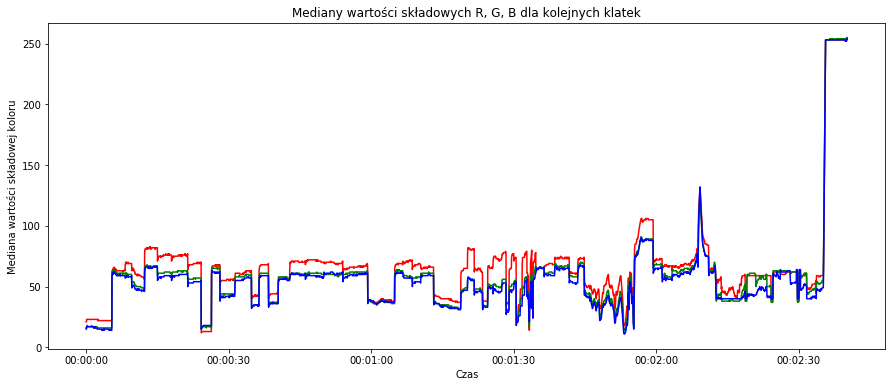

In [3]:
# mediany w przestrzeni RGB
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data, x='time_s', y='median_red', color='red')
sns.lineplot(data=frame_data, x='time_s', y='median_green', color='green')
sns.lineplot(data=frame_data, x='time_s', y='median_blue', color='blue')
plt.title('Mediany wartości składowych R, G, B dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Mediana wartości składowej koloru')
plt.savefig("pictures/frame_detect_02.png")
plt.show()

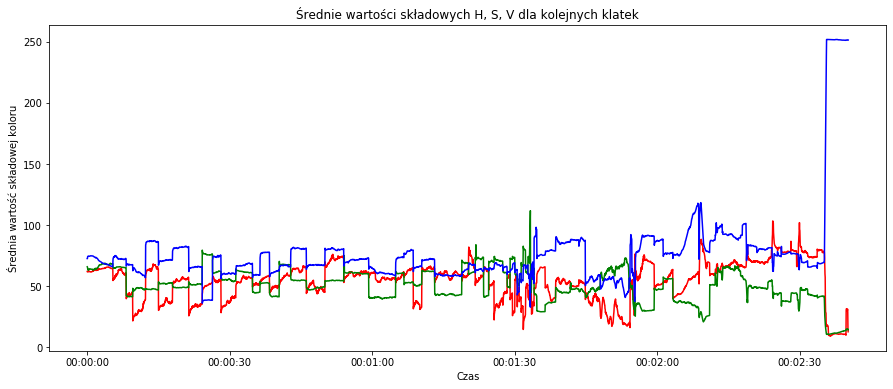

In [4]:
# średnie w przestrzeni HSV
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data, x='time_s', y='mean_hue', color='red')
sns.lineplot(data=frame_data, x='time_s', y='mean_saturation', color='green')
sns.lineplot(data=frame_data, x='time_s', y='mean_value', color='blue')
plt.title('Średnie wartości składowych H, S, V dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Średnia wartość składowej koloru')
plt.savefig("pictures/frame_detect_03.png")
plt.show()

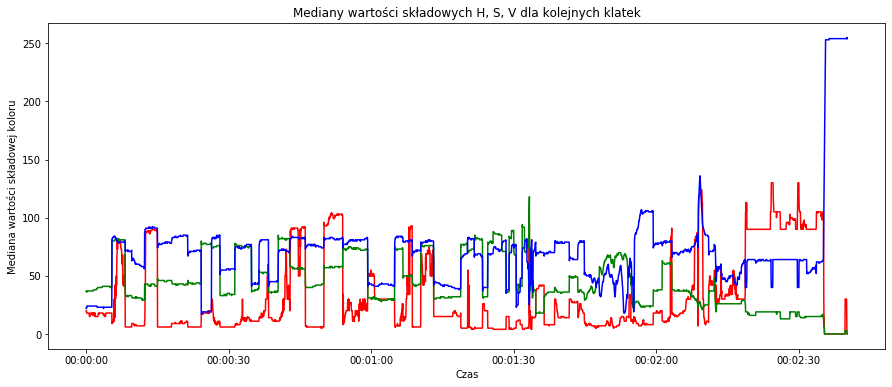

In [5]:
# mediany w przestrzeni HSV
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data, x='time_s', y='median_hue', color='red')
sns.lineplot(data=frame_data, x='time_s', y='median_saturation', color='green')
sns.lineplot(data=frame_data, x='time_s', y='median_value', color='blue')
plt.title('Mediany wartości składowych H, S, V dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Mediana wartości składowej koloru')
plt.savefig("pictures/frame_detect_04.png")
plt.show()

In [6]:
# liczymy średnie ze składowych w ramach obu przestrzni barw,
# zarówno dla średnich jak i median
# zrobimy to na kopii oryginalnych danych
frame_data_means = frame_data.copy()

frame_data_means['mean_rgb'] = (frame_data_means['mean_red'] + frame_data_means['mean_green'] + frame_data_means['mean_blue'])/3
frame_data_means['median_rgb'] = (frame_data_means['median_red'] + frame_data_means['median_green'] + frame_data_means['median_blue'])/3

frame_data_means['mean_hsv'] = (frame_data_means['mean_hue'] + frame_data_means['mean_saturation'] + frame_data_means['mean_value'])/3
frame_data_means['median_hsv'] = (frame_data_means['median_hue'] + frame_data_means['median_saturation'] + frame_data_means['median_value'])/3

# pozostawiamy tylko potrzebne kolumny
frame_data_means = frame_data_means[['frame', 'time_s', 'mean_rgb', 'median_rgb', 'mean_hsv', 'median_hsv']]

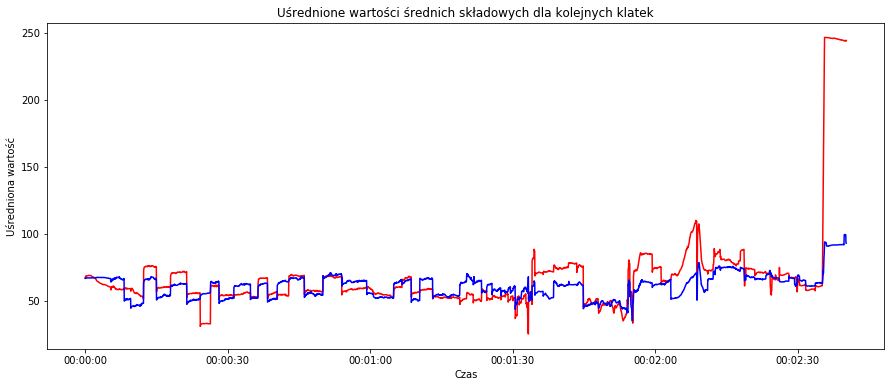

In [7]:
# różnica pomiędzy średnimi w obu przestrzeniach barwnych
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data_means, x='time_s', y='mean_rgb', color='red')
sns.lineplot(data=frame_data_means, x='time_s', y='mean_hsv', color='blue')
plt.title('Uśrednione wartości średnich składowych dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Uśredniona wartość')
plt.savefig("pictures/frame_detect_05.png")
plt.show()

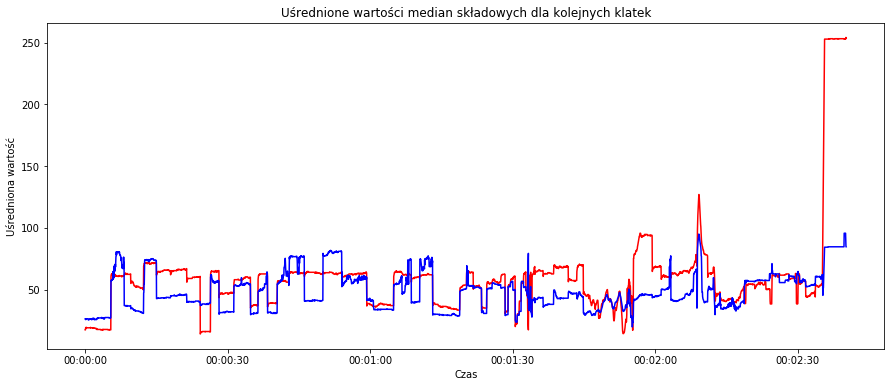

In [8]:
# różnica pomiędzy medianami w obu przestrzeniach barwnych
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data_means, x='time_s', y='median_rgb', color='red')
sns.lineplot(data=frame_data_means, x='time_s', y='median_hsv', color='blue')
plt.title('Uśrednione wartości median składowych dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Uśredniona wartość')
plt.savefig("pictures/frame_detect_06.png")
plt.show()

In [9]:
# procentowa różnica pomiędzy wartościami z kolejnych wierszy dla wskazanych kolumn
# 100* żeby mieć wartości w procentach
frame_data_means_changes = 100*frame_data_means[['mean_rgb', 'median_rgb',
                                             'mean_hsv', 'median_hsv']].pct_change()

# dodajemy do różnic informacje o czasie i numerze klatki
frame_data_means_changes = pd.concat([frame_data_means_changes,
                                      frame_data_means[['frame', 'time_s']]],
                                     axis=1)

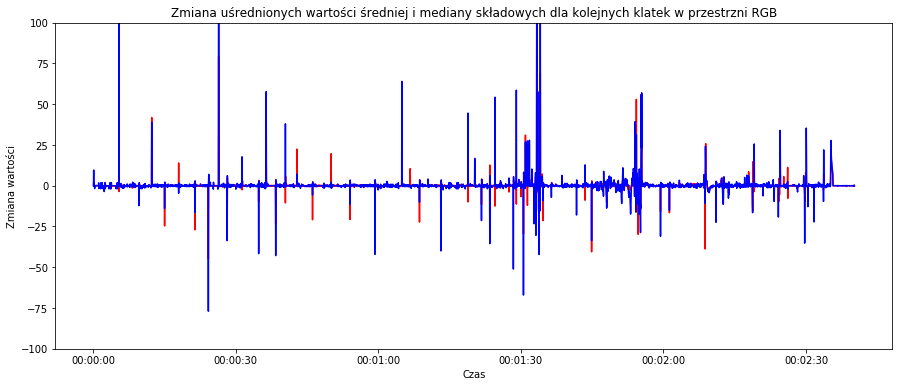

In [10]:
# zmiana dla RGB
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data_means_changes, x='time_s', y='mean_rgb', color='red')
sns.lineplot(data=frame_data_means_changes, x='time_s', y='median_rgb', color='blue')
plt.title('Zmiana uśrednionych wartości średniej i mediany składowych dla kolejnych klatek w przestrzni RGB')
plt.xlabel('Czas')
plt.ylabel('Zmiana wartości')
plt.ylim(-100, 100) # ten sam zakres osi Y dla obu przestrzeni barw!
plt.savefig("pictures/frame_detect_07.png")
plt.show()

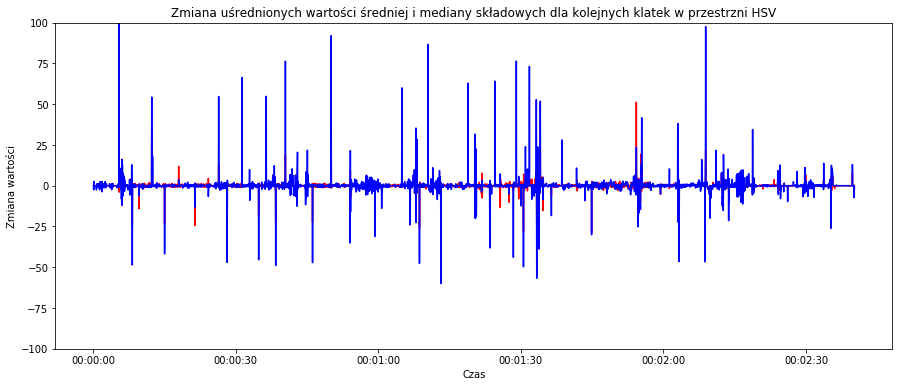

In [11]:
# zmiana dla HSV
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data_means_changes, x='time_s', y='mean_hsv', color='red')
sns.lineplot(data=frame_data_means_changes, x='time_s', y='median_hsv', color='blue')
plt.title('Zmiana uśrednionych wartości średniej i mediany składowych dla kolejnych klatek w przestrzni HSV')
plt.xlabel('Czas')
plt.ylabel('Zmiana wartości')
plt.ylim(-100, 100)
plt.savefig("pictures/frame_detect_08.png")
plt.show()

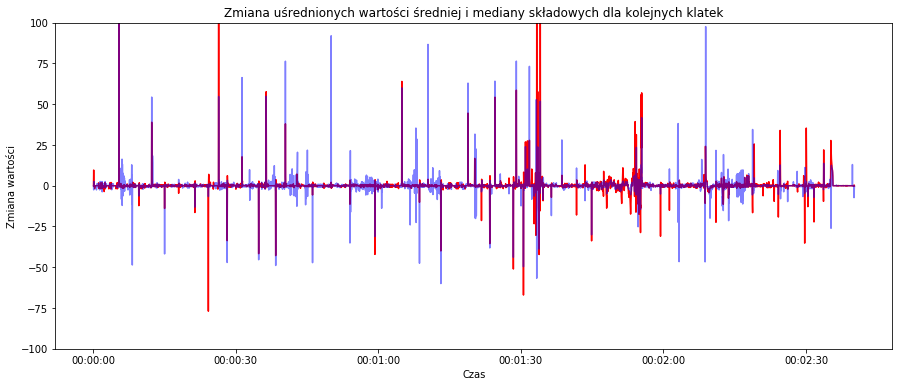

In [12]:
# zmiana dla median
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=frame_data_means_changes, x='time_s', y='median_rgb', color='red')
sns.lineplot(data=frame_data_means_changes, x='time_s', y='median_hsv', color='blue', alpha=0.5)
plt.title('Zmiana uśrednionych wartości średniej i mediany składowych dla kolejnych klatek')
plt.xlabel('Czas')
plt.ylabel('Zmiana wartości')
plt.ylim(-100, 100)
plt.savefig("pictures/frame_detect_09.png")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


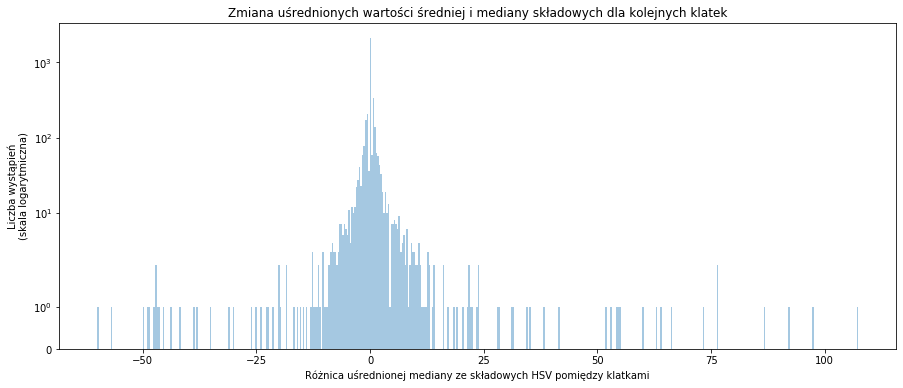

In [13]:
fig = plt.figure(figsize=(15,6))
sns.distplot(frame_data_means_changes['median_hsv'], bins=500, rug=False, kde=False)
plt.title('Zmiana uśrednionych wartości średniej i mediany składowych dla kolejnych klatek')
plt.xlabel('Różnica uśrednionej mediany ze składowych HSV pomiędzy klatkami')
plt.ylabel('Liczba wystąpień\n(skala logarytmiczna)')
plt.yscale('symlog')
plt.savefig("pictures/frame_detect_10.png")
plt.show()

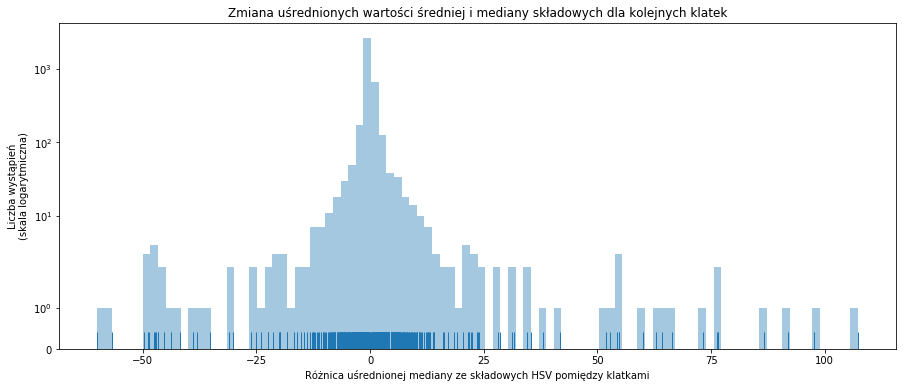

In [14]:
fig = plt.figure(figsize=(15,6))
sns.distplot(frame_data_means_changes['median_hsv'], bins=100, rug=True, kde=False)
plt.title('Zmiana uśrednionych wartości średniej i mediany składowych dla kolejnych klatek')
plt.xlabel('Różnica uśrednionej mediany ze składowych HSV pomiędzy klatkami')
plt.ylabel('Liczba wystąpień\n(skala logarytmiczna)')
plt.yscale('symlog')
plt.savefig("pictures/frame_detect_11.png")
plt.show()